In [1]:
##module
#python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

"""#tensorfrow
import tensorflow as tf

#Keras
from keras.models import Model
from keras.layers import Input,Average,Embedding,Dense,Dropout
from keras import regularizers
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy,Precision,Recall
from keras.optimizers import Adam"""


'#tensorfrow\nimport tensorflow as tf\n\n#Keras\nfrom keras.models import Model\nfrom keras.layers import Input,Average,Embedding,Dense,Dropout\nfrom keras import regularizers\nfrom keras.utils import to_categorical\nfrom keras.utils import plot_model\nfrom keras.metrics import CategoricalAccuracy,Precision,Recall\nfrom keras.optimizers import Adam'

In [8]:
#function
def text(path):
    with open(path) as f:
        text=f.read()
    
    return text

def corpus(text,seq_length):
    table=str.maketrans({".":None, "," : None,":" : None,";" : None,"!" : None,'"' :None,"#" :None,"$" :None,"%" :None,"&" :None,"'" :None,'"':None,"(" :None,")" :None,"=" :None,"~" :None,"{" :None,"}" :None,"[" :None,"]" :None,"/":None,"-":None,"_":None,"^":None,"©":None})
    text=text.lower()
    text=text.translate(table)
    words=text.split()

    texts=[]
    for i in range(len(words)-seq_length):
        texts.append(words[i:i+seq_length])
    
    corpus=[]
    for i in range(len(texts)):
        conditions=texts[i][2]
        if conditions=='el' or conditions=='la' or conditions=='los' or conditions=='las' or conditions=='lo' or conditions=='un' or conditions=='unos' or conditions=='una' or conditions=='unas':
            try:
               corpus.append(texts[i-2])
               corpus.append(texts[i-1])
               corpus.append(texts[i])
               corpus.append(texts[i+1])
               corpus.append(texts[i+2])
            except IndexError:
                pass

    return corpus

def w2v(corpus,vector_size,window,min_count,sg,w2v_name):
    w2v=Word2Vec(sentences=corpus,vector_size=vector_size,window=window,min_count=min_count,sg=sg)
    w2v.train(corpus,total_examples=len(corpus),epochs=50)
    w2v.save(w2v_name+'_w2v')
    w2v.wv.save_word2vec_format(w2v_name+'_kv',binary=True)

    return


def get_w2v(w2v_kv):
    w2v=KeyedVectors.load_word2vec_format(w2v_kv,binary=True,encoding="UTF-8")
   
    return w2v

def get_w2v_word_index(w2v):
   index_word={0:'<pad>'}
   for i in range(len(w2v)):
    index_word[i+1]=w2v.index_to_key[i]
    
   word_index={key : word for word,key in index_word.items()}
    
   return word_index,index_word

def get_emb_mat(w2v, word_index):
    """
    keras.layers.Embeddingのweights引数で指定するための重み行列作成
    model: gensim model
    num_word: modelのvocabularyに登録されている単語数
    emb_dim: 分散表現の次元
    word_index: gensim modelのvocabularyに登録されている単語名をkeyとし、token idをvalueとする辞書 ex) {'word A in gensim model vocab': integer token id} 
    """
    # gensim modelの分散表現を格納するための変数を宣言
    emb_mat = np.zeros((max(list(word_index.values())) + 1, w2v.vector_size), dtype="float32")
   
    # 分散表現を順に行列に格納する
    for word, label in word_index.items():
        try:
            # gensimのvocabularyに登録している文字列をembedding layerに入力するone-hot vectorのインデックスに変換して、該当する重み行列の要素に分散表現を代入
            emb_mat[label] = w2v[word]
        except KeyError:
            pass
    return emb_mat


def get_input_target(corpus,word_index):

    for seq in corpus:
        for i in range(len(seq)):
            try:
                seq[i]=word_index[seq[i]]
            except KeyError:
                seq[i]=0
    
    input_1=[]
    input_2=[]
    input_3=[]
    input_4=[]
    target=[]
    
    for context in corpus:
        
        if context[2]==word_index['el']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[0]])

        elif context[2]==word_index['la']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[1]])
    
    
        elif context[2]==word_index['los']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[2]])
    
    
        elif context[2]==word_index['las']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[3]])
    
        elif context[2]==word_index['lo']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[4]])
    

        elif context[2]==word_index['un']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[5]])
    
    
        elif context[2]==word_index['unos']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[6]])
    
    
        elif context[2]==word_index['una']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[7]])
    
    
        elif context[2]==word_index['unas']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[8]])
    
    
        elif context[2]==word_index['<pad>']:
            input_1.append([context[0]])
            input_2.append([context[1]])
            input_3.append([context[3]])
            input_4.append([context[4]])
            target.append([[9]])

        else:
            try:
                input_1.append([context[0]])
                input_2.append([context[1]])
                input_3.append([context[3]])
                input_4.append([context[4]])
                target.append([[10]])
            except IndexError:
                pass

    input_1=np.array(input_1)
    input_2=np.array(input_2)
    input_3=np.array(input_3)
    input_4=np.array(input_4)
    #target=to_categorical(target)
    
    
    return input_1,input_2,input_3,input_4,target

    

In [9]:
#preprocessing
text=text('raw_Edited/adventure_after2.txt')
corpus=corpus(text,7)
#w2v(corpus,100,2,25,1,'predict_word')


In [10]:
corpus

[['muerto', 'este', 'escrito', 'es', 'suyo', 'final', 'del'],
 ['un', 'sastre', 'y', 'un', 'orfebre', 'que', 'vagaban'],
 ['sastre', 'y', 'un', 'orfebre', 'que', 'vagaban', 'juntos'],
 ['y', 'un', 'orfebre', 'que', 'vagaban', 'juntos', 'por'],
 ['un', 'orfebre', 'que', 'vagaban', 'juntos', 'por', 'esos'],
 ['por', 'esos', 'mundos', 'oyeron', 'un', 'atardecer', 'cuando'],
 ['esos', 'mundos', 'oyeron', 'un', 'atardecer', 'cuando', 'ya'],
 ['mundos', 'oyeron', 'un', 'atardecer', 'cuando', 'ya', 'el'],
 ['oyeron', 'un', 'atardecer', 'cuando', 'ya', 'el', 'sol'],
 ['un', 'atardecer', 'cuando', 'ya', 'el', 'sol', 'se'],
 ['un', 'atardecer', 'cuando', 'ya', 'el', 'sol', 'se'],
 ['atardecer', 'cuando', 'ya', 'el', 'sol', 'se', 'habã\xada'],
 ['cuando', 'ya', 'el', 'sol', 'se', 'habã\xada', 'ocultado'],
 ['ya', 'el', 'sol', 'se', 'habã\xada', 'ocultado', 'tras'],
 ['el', 'sol', 'se', 'habã\xada', 'ocultado', 'tras', 'los'],
 ['se', 'habã\xada', 'ocultado', 'tras', 'los', 'montes', 'los'],
 ['ha

In [ ]:
w2v=get_w2v('predict_word_kv')
word_index,index_word=get_w2v_word_index(w2v)
emb_mat=get_emb_mat(w2v,word_index)
input_1,input_2,input_3,input_4,target=get_input_target(corpus,word_index)
num_words,w2v_size=emb_mat.shape

In [35]:
emb_mat.shape

(22873, 100)

In [7]:
len(input_1)

2650400

In [8]:
input_1_train=input_1[:2120320]
input_2_train=input_2[:2120320]
input_3_train=input_3[:2120320]
input_4_train=input_4[:2120320]
target_train=target[:2120320]
input_1_test=input_1[2120320:]
input_2_test=input_2[2120320:]
input_3_test=input_3[2120320:]
input_4_test=input_4[2120320:]
target_test=target[2120320:]

In [25]:
#creatie model
strategy=tf.distribute.MirroredStrategy()
with strategy.scope():
     input1=Input(shape=(1,))
     input2=Input(shape=(1,))
     input3=Input(shape=(1,))
     input4=Input(shape=(1,))
     
     x1=Embedding(input_dim=num_words,output_dim=w2v_size,weights=[emb_mat],mask_zero=True,input_length=1)(input1)
     x2=Embedding(input_dim=num_words,output_dim=w2v_size,weights=[emb_mat],mask_zero=True,input_length=1)(input2)
     x3=Embedding(input_dim=num_words,output_dim=w2v_size,weights=[emb_mat],mask_zero=True,input_length=1)(input3)
     x4=Embedding(input_dim=num_words,output_dim=w2v_size,weights=[emb_mat],mask_zero=True,input_length=1)(input4)

     x=Average()([x1,x2,x3,x4])

     y=Dropout(0.25)(x)
     y=Dense(256)(y)
     y=Dropout(0.5)(y)
     y=Dense(11,activation='softmax',kernel_regularizer=regularizers.l2(0.001))(y)

     model=Model(inputs=[input1,input2,input3,input4],outputs=y)
     model.compile(optimizer=Adam(learning_rate=0.000001),loss='categorical_crossentropy',metrics=[CategoricalAccuracy(name='acc'),Precision(),Recall()])


   


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [26]:
model.summary()   

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                            

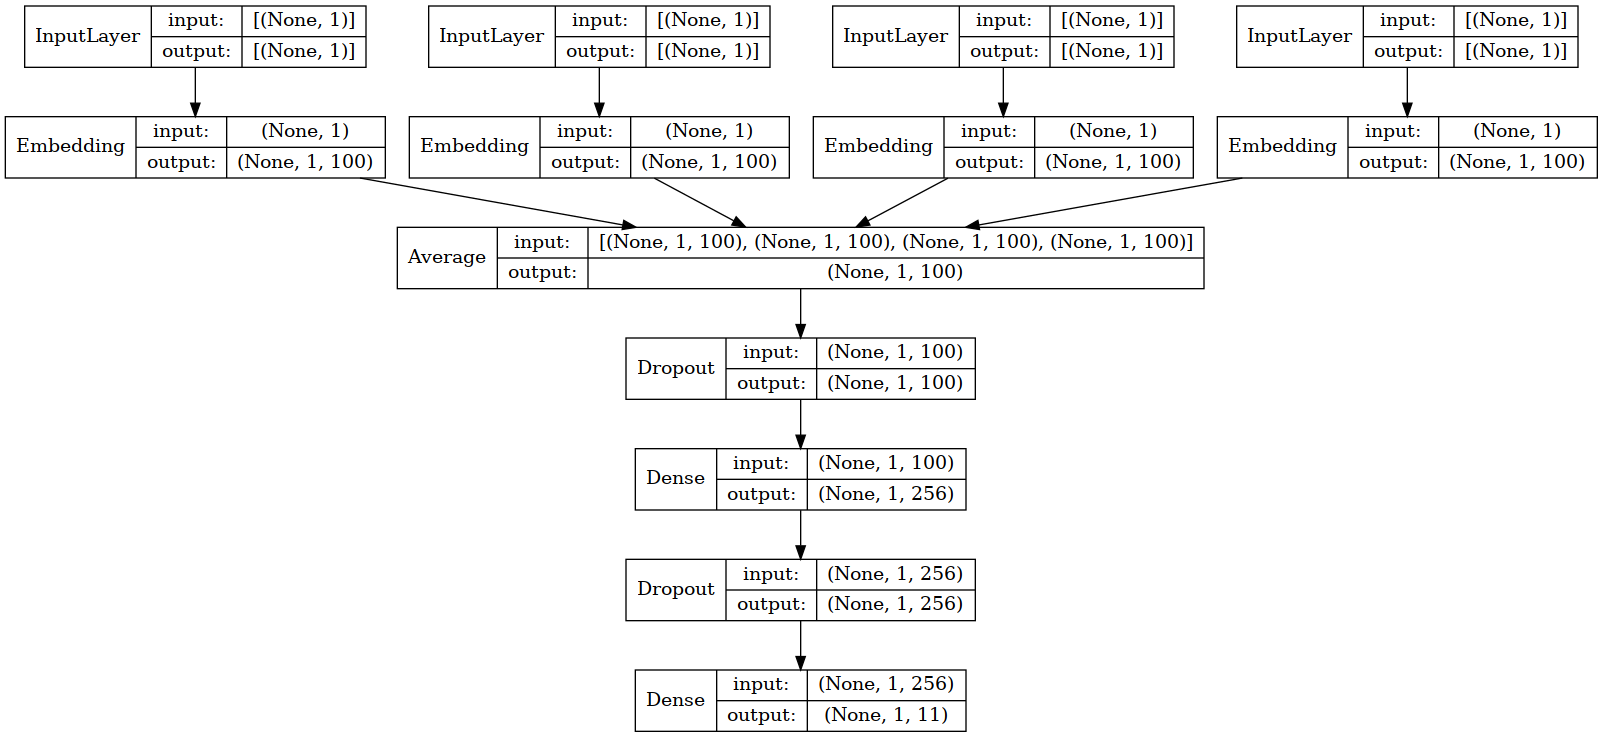

In [27]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [28]:
#training model
history=model.fit([input_1_train,input_2_train,input_3_train,input_4_train],target_train,epochs=100,batch_size=128,validation_split=0.1)

Epoch 1/100
14909/14909 [==============================] - 246s 16ms/step - loss: 1.1318 - acc: 0.5858 - precision_3: 0.7524 - recall_3: 0.1801 - val_loss: 0.7884 - val_acc: 0.7366 - val_precision_3: 0.7446 - val_recall_3: 0.7336
Epoch 2/100
14909/14909 [==============================] - 239s 16ms/step - loss: 0.7461 - acc: 0.7359 - precision_3: 0.7550 - recall_3: 0.7043 - val_loss: 0.6972 - val_acc: 0.7366 - val_precision_3: 0.7403 - val_recall_3: 0.7366
Epoch 3/100
14909/14909 [==============================] - 241s 16ms/step - loss: 0.6787 - acc: 0.7371 - precision_3: 0.7763 - recall_3: 0.7191 - val_loss: 0.6417 - val_acc: 0.7366 - val_precision_3: 0.7619 - val_recall_3: 0.7366
Epoch 4/100
14909/14909 [==============================] - 240s 16ms/step - loss: 0.6302 - acc: 0.7413 - precision_3: 0.8070 - recall_3: 0.7188 - val_loss: 0.5954 - val_acc: 0.7379 - val_precision_3: 0.8051 - val_recall_3: 0.7365
Epoch 5/100
14909/14909 [==============================] - 240s 16ms/step - loss

In [29]:
# 生データの保存
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('predict_word.csv')

<Figure size 640x480 with 0 Axes>

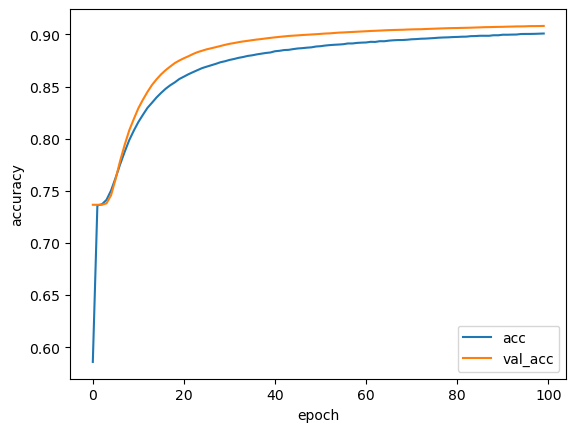

In [30]:
# 可視化
plt.figure()
hist_df[['acc', 'val_acc']].plot()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('predict_word_acc.png')

<Figure size 640x480 with 0 Axes>

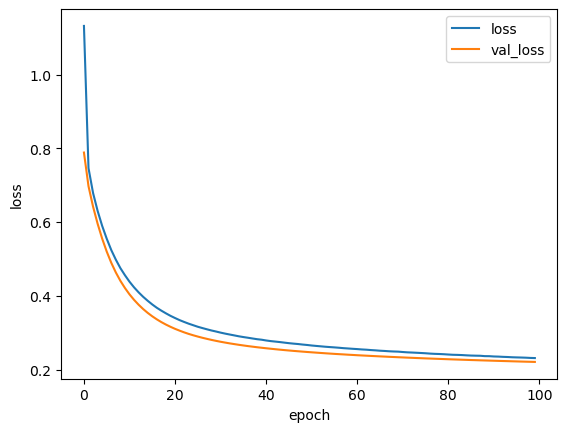

In [31]:
plt.figure()
hist_df[['loss', 'val_loss']].plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('predict_word_los.png')

In [32]:
score = model.evaluate([input_1_test,input_2_test,input_3_test,input_4_test] ,target_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])

16565/16565 [==============================] - 167s 10ms/step - loss: 0.2179 - acc: 0.8996 - precision_3: 0.9149 - recall_3: 0.8822

Test loss: 0.21792930364608765
Test accuracy: 0.8995634913444519
Test precision: 0.914913535118103
Test recall: 0.8822405934333801


In [1]:
2*score[2]*score[3]/(score[2]+score[3])

NameError: name 'score' is not defined

In [33]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'precision_3', 'recall_3', 'val_loss', 'val_acc', 'val_precision_3', 'val_recall_3'])


In [34]:
model.save('predict_word.h5')